## Importação das Bibliotecas

In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

## Carregamento dos Dados
Carregamos o conjunto de dados de doença cardíaca a partir de um arquivo CSV para um DataFrame do pandas.

In [ ]:
cleveland = pd.read_csv('./heart.csv')

## Visualização Inicial dos Dados
Visualizamos o formato do DataFrame e alguns exemplos de registros para entender a estrutura dos dados.

In [ ]:
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (1025, 14)
age          53.0
sex           1.0
cp            0.0
trestbps    140.0
chol        203.0
fbs           1.0
restecg       0.0
thalach     155.0
exang         1.0
oldpeak       3.1
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 1, dtype: float64


## Visualização dos Últimos Dados
Exibimos as últimas linhas do DataFrame para verificar possíveis padrões ou valores ausentes no final do conjunto de dados.

In [ ]:
# print the last twenty or so data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Remoção de Dados Faltantes
Removemos registros com valores ausentes (indicados por '?') para garantir a qualidade dos dados antes da análise.

In [ ]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Remoção de Linhas com NaN
Eliminamos linhas que ainda contenham valores NaN após a filtragem inicial, garantindo que todos os dados estejam completos.

In [ ]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Verificação da Estrutura dos Dados
Após o pré-processamento, verificamos o formato e os tipos de dados do DataFrame resultante.

In [ ]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


## Conversão dos Dados para Numérico
Convertendo todos os dados para o tipo numérico, o que é necessário para análises estatísticas e modelagem.

In [ ]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


## Estatísticas Descritivas dos Dados
Utilizamos a função `describe()` do pandas para obter estatísticas descritivas dos dados, como média, desvio padrão, valores mínimos e máximos.

In [ ]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Visualização das Distribuições das Variáveis
Plotamos histogramas para cada variável, facilitando a análise da distribuição dos dados e identificação de possíveis outliers.

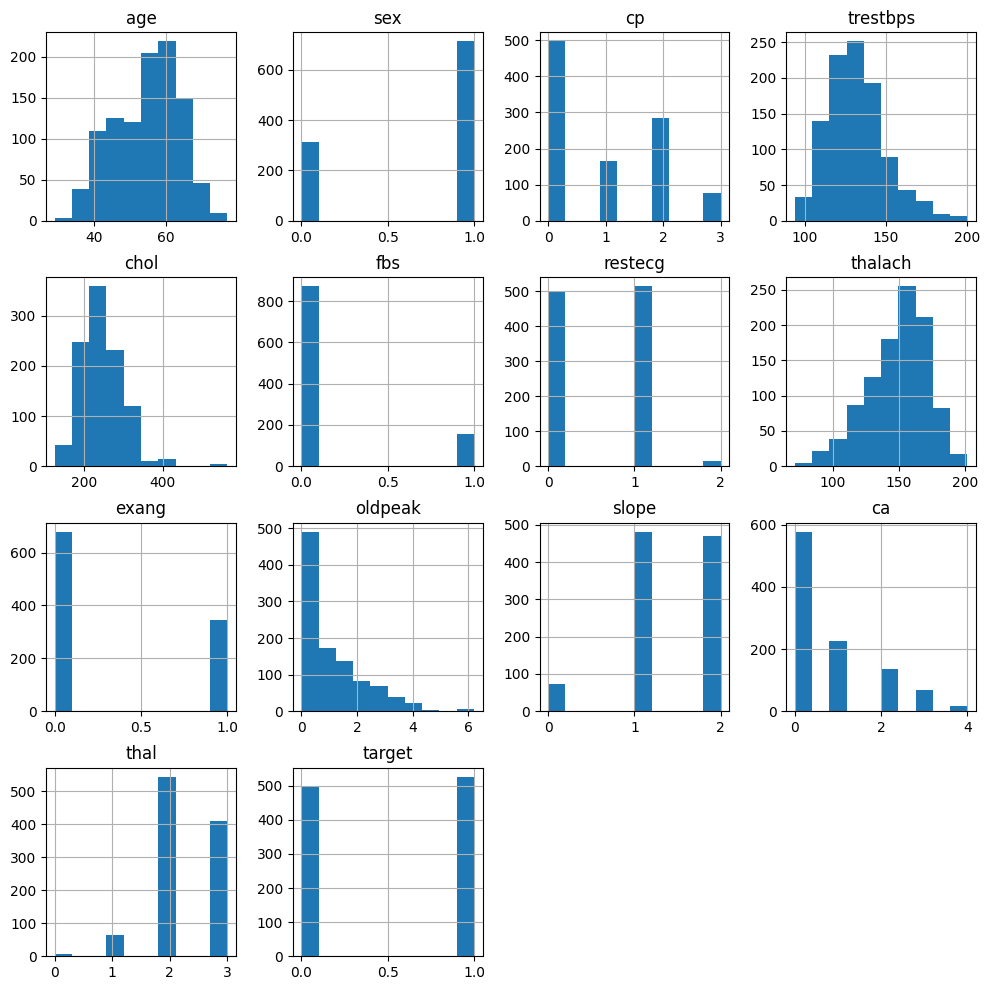

In [ ]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

## Frequência de Doença Cardíaca por Idade
Visualizamos a frequência de ocorrência de doença cardíaca em diferentes faixas etárias utilizando gráficos de barras.

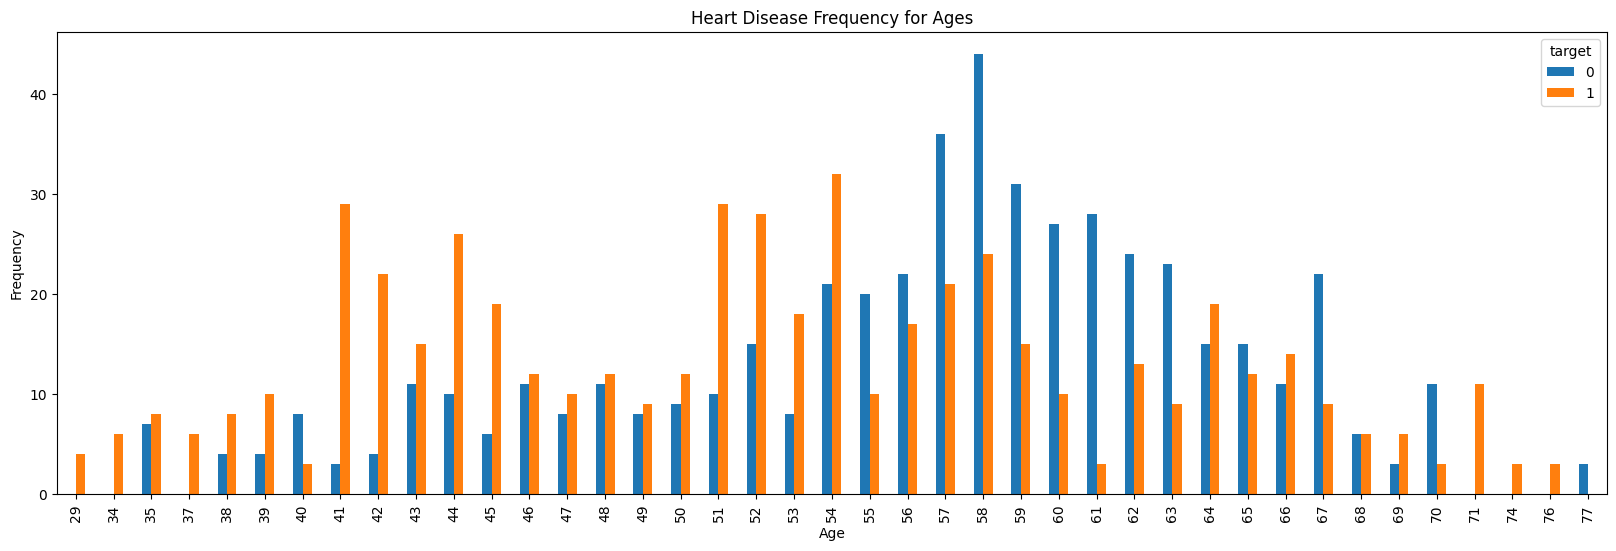

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Matriz de Correlação
A matriz de correlação mostra a relação entre as variáveis do conjunto de dados, auxiliando na identificação de possíveis relações importantes para a modelagem.

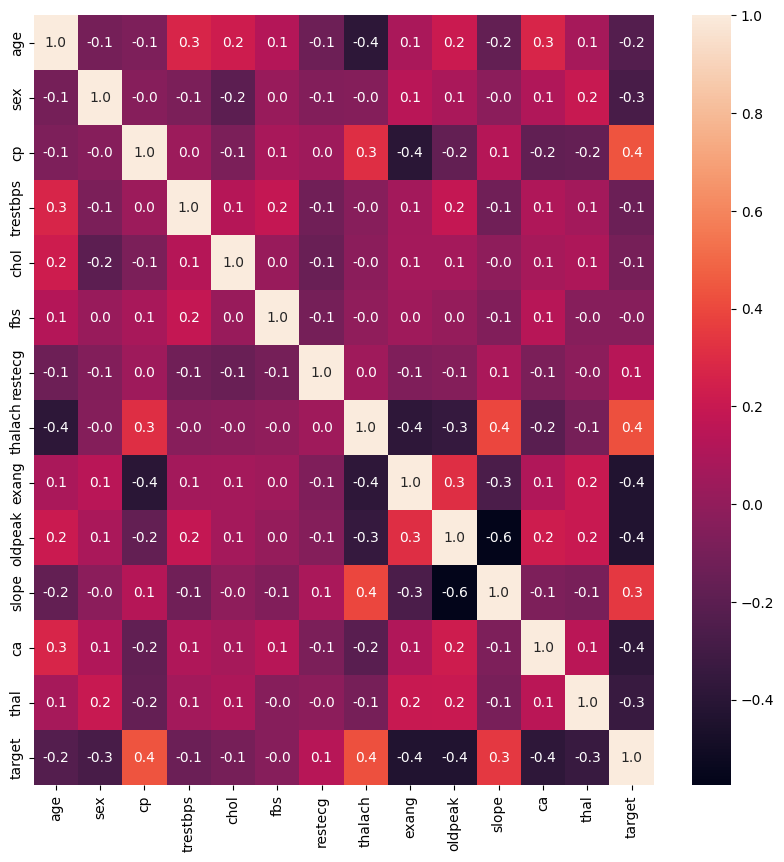

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

## Relação entre Idade e Frequência Cardíaca Máxima (Thalach)
Analisamos como a frequência cardíaca máxima varia com a idade, utilizando gráficos de pontos para visualizar tendências.

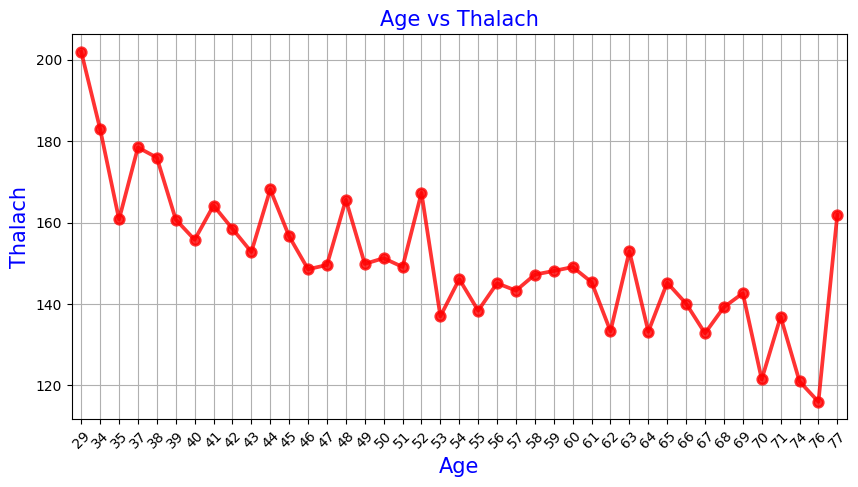

In [ ]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

## Separação de Variáveis Independentes e Alvo
Separamos as variáveis independentes (X) da variável alvo (y), que indica a presença ou ausência de doença cardíaca.

In [ ]:
X = np.array(data.drop(['target'], axis=1))
y = np.array(data['target'])

## Exemplo de Dados de Entrada
Visualizamos um exemplo de vetor de entrada (X) após a separação das variáveis.

In [ ]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

## Normalização dos Dados
Normalizamos os dados para que todas as variáveis tenham média zero e desvio padrão um, o que melhora o desempenho dos algoritmos de machine learning.

In [ ]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

## Exemplo de Dados Normalizados
Visualizamos um exemplo de vetor de entrada após a normalização.

In [ ]:
X[0]

array([-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
       -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
        0.99543334,  1.20922066,  1.08985168])

## Divisão dos Dados em Treino e Teste
Dividimos os dados em conjuntos de treino e teste para avaliar o desempenho dos modelos de machine learning de forma justa.

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

## Conversão da Saída para Categórica
Convertendo a variável alvo para o formato categórico (one-hot encoding), necessário para o treinamento do modelo de classificação multiclasse.

In [ ]:
# convert the data to categorical labels
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(820, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


## Exemplo de Dados de Treino
Visualizamos um exemplo de vetor de entrada do conjunto de treino após o pré-processamento.

In [ ]:
X_train[0]

array([ 0.834359  , -1.51170646, -0.91575542,  0.36487493,  0.93082177,
        2.38733039,  0.89125488, -1.87497657, -0.71228712,  0.70540823,
       -0.6241209 ,  2.17981673, -0.52212231])

## Definição e Compilação do Modelo Keras (Multiclasse)
Definimos a arquitetura do modelo de rede neural para classificação multiclasse, utilizando camadas densas, dropout e regularização.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input  # Import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 378 (1.48 KB)

 Non-trainable params: 0 (0.00 B)

None


## Treinamento do Modelo Multiclasse
Treinamos o modelo de rede neural com os dados de treino, avaliando o desempenho em cada época com o conjunto de teste.

In [ ]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6662 - loss: 0.6696 - val_accuracy: 0.8000 - val_loss: 0.5817
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7644 - loss: 0.5646 - val_accuracy: 0.8537 - val_loss: 0.4732
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8204 - loss: 0.4614 - val_accuracy: 0.8293 - val_loss: 0.4101
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8458 - loss: 0.4007 - val_accuracy: 0.8390 - val_loss: 0.3755
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8709 - loss: 0.3869 - val_accuracy: 0.8341 - val_loss: 0.3600
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8635 - loss: 0.3712 - val_accuracy: 0.8293 - val_loss: 0.3481
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.3710 - val_accuracy: 0.8341 - val_loss: 0.3457
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8990 - loss: 0.3387 - val_accuracy: 0.8488 - val_loss:

## Visualização da Acurácia do Modelo Multiclasse
Plotamos a evolução da acurácia do modelo durante o treinamento para os conjuntos de treino e teste.

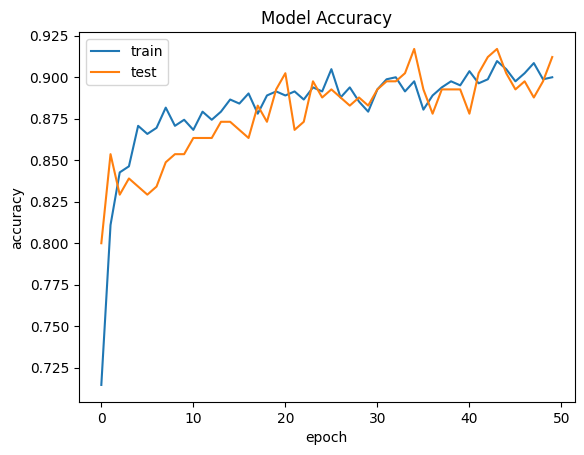

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Visualização da Perda do Modelo Multiclasse
Abaixo, mostramos como a função de perda (loss) do modelo multiclasse evolui durante o treinamento, tanto para os dados de treino quanto de teste.

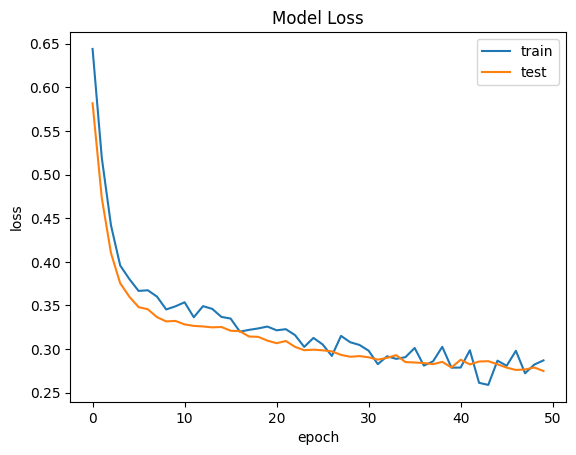

In [ ]:
# Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Conversão para Classificação Binária
Convertendo a variável alvo para um problema de classificação binária: 0 indica ausência de doença e 1 indica presença de doença cardíaca.

In [ ]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0]


## Definição do Modelo Keras para Classificação Binária
Definimos um novo modelo de rede neural para classificação binária, ajustando a saída e a função de ativação para o problema de duas classes.

In [ ]:
# (Make sure your imports are from tensorflow.keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()

    # I'll apply the 'Input' fix here too to avoid the warning
    model.add(Input(shape=(13,)))
    model.add(Dense(16, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model

    # ----- THIS IS THE FIX -----
    adam = Adam(learning_rate=0.001) # Changed 'lr' to 'learning_rate'
    # ---------------------------

    # As before, this code defines 'adam' but uses 'rmsprop'.
    # This is fine, but just pointing it out.
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

None


## Treinamento do Modelo Binário
Treinamos o modelo binário com os dados de treino e avaliamos o desempenho em cada época com o conjunto de teste.

In [ ]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6057 - loss: 0.6812 - val_accuracy: 0.8244 - val_loss: 0.5980
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8416 - loss: 0.5602 - val_accuracy: 0.8390 - val_loss: 0.4525
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8198 - loss: 0.4360 - val_accuracy: 0.8341 - val_loss: 0.3810
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8574 - loss: 0.3911 - val_accuracy: 0.8390 - val_loss: 0.3549
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3898 - val_accuracy: 0.8439 - val_loss: 0.3438
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8539 - loss: 0.3863 - val_accuracy: 0.8439 - val_loss: 0.3338
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8631 - loss: 0.3575 - val_accuracy: 0.8537 - val_loss: 0.3297
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8641 - loss: 0.3539 - val_accuracy: 0.8634 - val_loss:

## Visualização da Acurácia do Modelo Binário
Plotamos a evolução da acurácia do modelo binário durante o treinamento para os conjuntos de treino e teste.

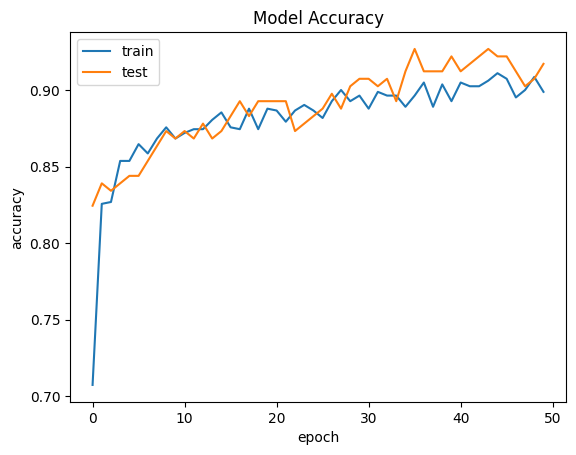

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Visualização da Perda do Modelo Binário
Abaixo, mostramos como a função de perda (loss) do modelo binário evolui durante o treinamento, tanto para os dados de treino quanto de teste.

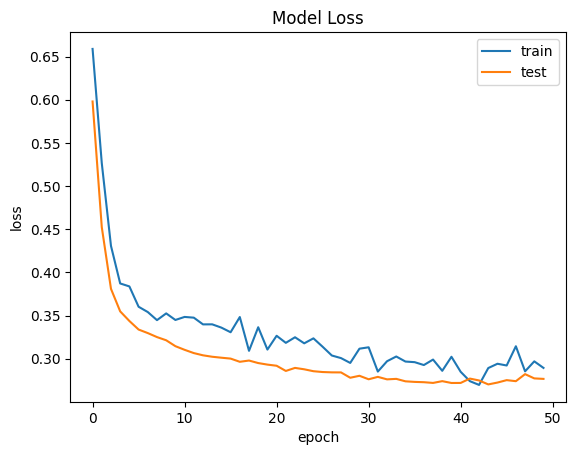

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Avaliação do Modelo Multiclasse
Geramos o relatório de classificação e a acurácia do modelo multiclasse, analisando o desempenho em cada classe.

In [ ]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Results for Categorical Model
0.9121951219512195
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       100
           1       0.90      0.93      0.92       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



## - Avaliação do Modelo Categórico

O relatório de classificação apresenta as seguintes métricas:
- **Precisão (Precision)**: Mede a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo.
- **Recall**: Mede a proporção de casos positivos corretamente identificados pelo modelo.
- **F1-Score**: Uma média harmônica entre precisão e recall, útil para avaliar o equilíbrio entre essas métricas.

A acurácia geral do modelo foi de **91%**, indicando que o modelo acertou mais de 9 em cada 10 previsões.

### - Resumo dos Resultados
- **Classe 0 (Sem Doença)**: Precisão 93%, Recall 89%, F1-score 91%
- **Classe 1 (Com Doença)**: Precisão 90%, Recall 93%, F1-score 92%
- As médias (macro e ponderada) ficaram em **0.91**, mostrando que o desempenho é consistente entre as classes.

## Avaliação do Modelo Binário e Matriz de Confusão
Geramos a matriz de confusão e o relatório de classificação para o modelo binário, analisando o desempenho na detecção de presença ou ausência de doença cardíaca.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


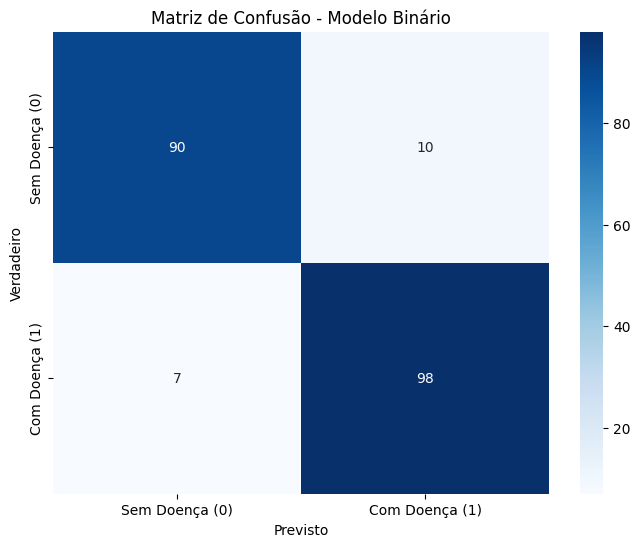

Results for Binary Model
0.9170731707317074
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       100
           1       0.91      0.93      0.92       105

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

binary_pred = np.round(binary_model.predict(X_test)).astype(int)

cm = confusion_matrix(Y_test_binary, binary_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sem Doença (0)', 'Com Doença (1)'],
            yticklabels=['Sem Doença (0)', 'Com Doença (1)'])
plt.title('Matriz de Confusão - Modelo Binário')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

## - Avaliação do Modelo Binário

O relatório de classificação apresenta as seguintes métricas:
- **Precisão (Precision)**: Mede a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo.
- **Recall**: Mede a proporção de casos positivos corretamente identificados pelo modelo.
- **F1-Score**: Uma média harmônica entre precisão e recall, útil para avaliar o equilíbrio entre essas métricas.

A matriz de confusão mostra a distribuição de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

### - Resumo dos Resultados
- O modelo atingiu uma **acurácia de 91,7%**, indicando que quase 9 em cada 10 previsões foram corretas.
- As métricas de precisão, recall e F1-score ficaram próximas de 0.90 para ambas as classes, mostrando que o modelo tem bom desempenho e equilíbrio entre identificar corretamente os casos com e sem doença.
- A matriz de confusão confirma esse equilíbrio, com poucos erros de classificação entre as classes.